In [2]:
import pandas as pd 
from pandas import Series 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tsfel


import sys 
sys.path.insert(1, r'D:\Python Projects\CMF\CMF 2022\Hackaton\CMF_hackathon-11')

import features

%load_ext autoreload
%autoreload 2

In [3]:
import features

In [4]:
data = pd.read_csv('orders.csv')

In [5]:
data.shape

(884856, 3)

In [6]:
data.head()

,delivery_area_id,date,orders_cnt
0,0,2021-04-01 10:00:00,9
1,0,2021-04-01 11:00:00,1
2,0,2021-04-01 13:00:00,1
3,0,2021-04-01 14:00:00,1
4,0,2021-04-01 15:00:00,2


In [16]:
data.groupby('delivery_area_id').agg({'date':'nunique'})

,date
delivery_area_id,
0,2839
1,2958
2,142
3,2598
4,2844
...,...
588,1711
589,889
590,1280


In [6]:
# data['delivery_area_id'].value_counts(normalize = True)

In [7]:
len(data['delivery_area_id'].unique())

593

In [8]:
area0 = data[data['delivery_area_id'] == 0]

In [9]:
area0

,delivery_area_id,date,orders_cnt
0,0,2021-04-01 10:00:00,9
1,0,2021-04-01 11:00:00,1
2,0,2021-04-01 13:00:00,1
3,0,2021-04-01 14:00:00,1
4,0,2021-04-01 15:00:00,2
...,...,...,...
2834,0,2021-11-30 17:00:00,10
2835,0,2021-11-30 18:00:00,21
2836,0,2021-11-30 19:00:00,10
2837,0,2021-11-30 20:00:00,15


In [10]:
area0_orders = area0['orders_cnt']

In [ ]:
#my_series.plot(figsize=(20, 4))
#plt.show()

In [10]:
dates = area0.date.astype(np.datetime64)
area0['Month'] = dates.apply(lambda x: x.month)
area0['Week'] = dates.apply(lambda x: x.week)
area0['Day'] = dates.apply(lambda x: x.day)
area0['Hour'] = dates.apply(lambda x: x.hour)
area0.tail(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,delivery_area_id,date,orders_cnt,Month,Week,Day,Hour
2834,0,2021-11-30 17:00:00,10,11,48,30,17
2835,0,2021-11-30 18:00:00,21,11,48,30,18
2836,0,2021-11-30 19:00:00,10,11,48,30,19
2837,0,2021-11-30 20:00:00,15,11,48,30,20
2838,0,2021-11-30 21:00:00,5,11,48,30,21


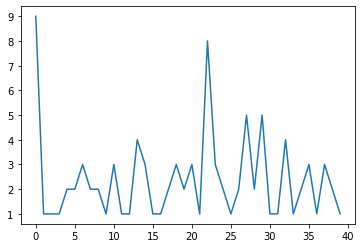

In [ ]:
my_series_w13 = area0[area0['Week'] == 13]
plt.plot(my_series_w13['orders_cnt'])
plt.show()

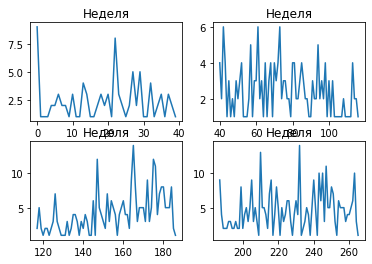

In [ ]:
#from matplotlib.pyplot import figure
#figure(figsize=(1, 1))
figure, axis = plt.subplots(2, 2)
t = 0
for i in range(2):
  for j in range(2): 
    pr = area0[area0['Week'] == (13+t)]
    axis[i, j].plot(pr['orders_cnt'])
    axis[i, j].set_title("Неделя")
    t += 1
plt.show()

Подготовка к кластеризации: ряд в разностях и в уровнях

In [7]:
data = features.daily_order_counts(data)

In [8]:
data

,delivery_area_id,date,orders_cnt
0,0,2021-04-01,24
1,0,2021-04-02,21
2,0,2021-04-03,33
3,0,2021-04-04,18
4,0,2021-04-05,32
...,...,...,...
97201,592,2021-11-26,56
97202,592,2021-11-27,50
97203,592,2021-11-28,46
97204,592,2021-11-29,73


In [9]:
df = data.pivot(index='delivery_area_id', columns='date', values='orders_cnt')

In [10]:
df.fillna(0, inplace=True)

In [15]:
df = df.astype('float16')

In [22]:
# Уменьшить тип данных 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 592
Columns: 244 entries, 2021-04-01 to 2021-11-30
dtypes: float64(244)
memory usage: 1.1 MB


In [17]:
standard_scaler = StandardScaler()
# min_max_scaler = MinMaxScaler()

df_scaled = standard_scaler.fit_transform(df)

D:\Python\Python 3.9\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['date']. An error will be raised in 1.2.
  warnings.warn(
D:\Python\Python 3.9\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['date']. An error will be raised in 1.2.
  warnings.warn(


In [25]:
from tslearn.clustering import TimeSeriesKMeans
from tqdm import tqdm 

In [29]:
distortions

[131500.65191583647,
 134756.8195441289,
 146758.0463570777,
 149913.54092775987,
 151581.65076555448,
 152638.59201303116,
 152969.50714586937,
 153525.11853507685]

100%|████████████████████████████████████████████████████████████████████████████████| 8/8 [2:26:40<00:00, 1100.07s/it]


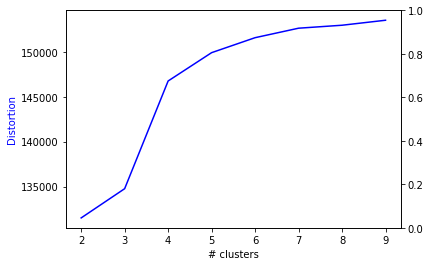

In [27]:
distortions = []
# silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="softdtw", n_jobs=-1, max_iter=10, n_init=5)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)
    # silhouette.append(silhouette_score(df_scaled, kmeanModel.labels_, metric="euclidean"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
# ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
# ax2.set_ylabel('Silhouette', color='r') # Больше значения - лучше 

plt.show()

In [ ]:
# ts_kmeans = TimeSeriesKMeans(n_clusters=4, metric="softdtw", n_jobs=-1, max_iter=10, n_init=5)
# ts_kmeans.fit(df_scaled)

dtw_cluster_labels = ts_kmeans.predict(df_scaled)

D:\Python\Python 3.9\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 593 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [36]:
df['labels'] = dtw_cluster_labels

In [38]:
df.labels.value_counts()

0    364
3    155
2     53
1     21
Name: labels, dtype: int64

In [37]:
dtw_cluster_labels

array([2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 1, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 0, 3, 3, 3, 2, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3,
       0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
area_df

,0
0,0
1,1
2,2
3,3
4,4
...,...
588,588
589,589
590,590
591,591


In [43]:
area_df = pd.DataFrame(data.delivery_area_id.unique())
area_df['cluster'] = dtw_cluster_labels
area_df.rename(columns={0:'area_id'}, inplace=True)

In [44]:
area_df

,area_id,cluster
0,0,2
1,1,2
2,2,0
3,3,2
4,4,2
...,...,...
588,588,3
589,589,0
590,590,0
591,591,0


In [45]:
area_df.to_excel('standard_scaler_clustering.xlsx', index=False)

# Ниже не нужно

In [24]:
cfg = tsfel.get_features_by_domain('spectral')

X_train = tsfel.time_series_features_extractor(cfg, data[['delivery_area_id', 'orders_cnt']], fs=100)

*** Feature extraction started ***
26



*** Feature extraction finished ***


In [11]:
import numpy as np

In [12]:
diff_area0 = np.diff(area0_orders) 

In [18]:
area0_orders

0        9
1        1
2        1
3        1
4        2
        ..
2834    10
2835    21
2836    10
2837    15
2838     5
Name: orders_cnt, Length: 2839, dtype: int64

In [16]:
len*diff_area0

array([ -8,   0,   0, ..., -11,   5, -10], dtype=int64)

In [17]:
pd.isnull(diff_area0).sum()

0

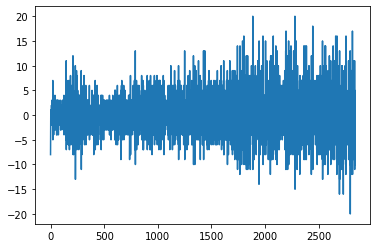

In [14]:
plt.plot(diff_area0)
plt.show()

DTW кластеризация с ограничением шага 

Кластеризация

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import time
from tqdm.autonotebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

!pip from tslearn.clustering import TimeSeriesKMeans, silhouette_score
!pip from sklearn.cluster import KMeans
!pip from sklearn.preprocessing import StandardScaler, MinMaxScaler

!pip from selenium import webdriver
!pip import yfinance as yf

ERROR: unknown command "from"
ERROR: unknown command "from"
ERROR: unknown command "from"
ERROR: unknown command "from"
ERROR: unknown command "import"


Шкалирование или нормилизация 

In [ ]:
new = np.array(area0['orders_cnt'])
len(new)

2839

Три способа

In [ ]:
from statistics import median
normalized_as_mean=(new-new.mean())/new.std()
normalized_as_max_min=(new-new.min())/(new.max()-new.min())
normalized_as_median = (new - median(new)) 

Определеляем количество кластеров: distortions (правило локтя) и silhoette (чем больше тем лучше без первых)

In [ ]:
distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(tickers_scaled)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(tickers_scaled, kmeanModel.labels_, metric="euclidean"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
for num_clusters in list(range(2, 12)):
  model_clus = KMeans(n_clusters = num_clusters, max_iter = 1000)
  model_clus.fit(data_normalized)
  cluster_labels = model_clus.labels_

  silhoette_avg = silhoette_score(data_normalized, cluster_labels)
  print('For n_clusters = {0}, the silhouette score is {1}'.format(num_clusters, silhouette_avg))


NameError: ignored